In [1]:
import mxnet as mx
from mxnet import nd
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline
display.set_matplotlib_formats("svg")

## Multinomial Distribution Example
The first type of experiment introduced in elementary statistics is usually the binomial experiment, which has the following properties:

- Fixed number of n trials.
- Each trial is an independent event.
- Only two outcomes are possible (Success and Failure).
- Probability of success (p) for each trial is constant.
- A random variable Y= the number of successes.

A multinomial experiment is almost identical with one main difference: a binomial experiment can have two outcomes, while a multinomial experiment can have multiple outcomes.

**Example**: You roll a die ten times to see what number you roll. There are 6 possibilities (1,2,3,4,5,6), so this is a multinomial experiment. If you rolled the die ten times to see how many times you roll a three, that would be a binomial experiment (3 = success, 1,2,4,5,6 = failure).

A binomial experiment will have a binomial distribution. A multinomial experiment will have a multinomial distribution.

Three card players play a series of matches. The probability that player A will win any game is 20%, the probability that player B will win is 30%, and the probability player C will win is 50%. If they play 6 games, what is the probability that player A will win 1 game, player B will win 2 games, and player C will win 3?


**Use the following formula to calculate the odds:**
$$p=\frac{n!}{n_1!n_2!\cdots n_3!}P_1P_2\cdots P_x$$

where:
- $n$=number of events
- $n_1$=number of outcomes of event 1
- $n_2$=number of outcomes of event 2
- $n_x$=number of outcomes of event x
- $P_1$=probability event 1 happens
- $P_2$=probability event 2 happens
- $P_x$=probability event x happens

therefore:
- $n=6$(6 games)
- $n_1=1$(player A wins)
- $n_2=2$(player B wins)
- $n_3=3$(player C wins)
- $P_1=0.20$(probability that player A wins)
- $P_2=0.30$(probability that player B wins)
- $P_3=0.50$(probability that player C wins)

Putting these together, we get:
$$ 
P(A=1,B=2,C=3$=\frac{6!}{1!2!3!}(0.2^1 0.3^2 0.5^3)=0.135 
$$

- define a multinomial distribution voer 6 outcomes

In [6]:
probabilities = nd.ones(6)/6
print(probabilities)
print(nd.random.multinomial(probabilities))
print(nd.random.multinomial(probabilities, shape=(10)))
print(nd.random.multinomial(probabilities, shape=(5,10)))


[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
<NDArray 6 @cpu(0)>

[5]
<NDArray 1 @cpu(0)>

[3 5 3 5 2 3 3 2 2 1]
<NDArray 10 @cpu(0)>

[[5 0 5 1 2 2 4 4 3 2]
 [3 2 5 5 0 2 0 3 0 2]
 [4 5 4 0 5 5 5 2 4 4]
 [2 3 4 4 0 4 3 3 0 3]
 [5 4 3 0 2 2 1 1 4 4]]
<NDArray 5x10 @cpu(0)>


- generate 1000 samples

In [11]:
rolls = nd.random.multinomial(probabilities, shape=(1000))
totals = nd.zeros((6))
# the total times of every value 
for value in rolls:
    totals[int(value.asscalar())] += 1
final = totals/1000
print(final)


[0.166 0.168 0.174 0.16  0.158 0.174]
<NDArray 6 @cpu(0)>


- convergence history

In [15]:
# column for sample index
counts = nd.zeros((6,1000))
for index, value in enumerate(rolls):
    counts[int(value.asscalar()),index] += 1
for column in nd.arange(1,1000):
    counts[:,column]+=counts[:,column-1]
print(counts)
# normalizing by the number of samples:
nSamples = nd.arange(1000).reshape(1,1000) + 1
estimates = counts/nSamples
print(estimates)


[[  0.   0.   0. ... 166. 166. 166.]
 [  0.   0.   0. ... 168. 168. 168.]
 [  0.   0.   0. ... 174. 174. 174.]
 [  0.   1.   1. ... 159. 160. 160.]
 [  1.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 174.]]
<NDArray 6x1000 @cpu(0)>

[[0.         0.         0.         ... 0.16633266 0.16616617 0.166     ]
 [0.         0.         0.         ... 0.16833667 0.16816817 0.168     ]
 [0.         0.         0.         ... 0.1743487  0.17417417 0.174     ]
 [0.         0.5        0.33333334 ... 0.15931864 0.16016015 0.16      ]
 [1.         0.5        0.6666667  ... 0.15831663 0.15815815 0.158     ]
 [0.         0.         0.         ... 0.1733467  0.17317317 0.174     ]]
<NDArray 6x1000 @cpu(0)>


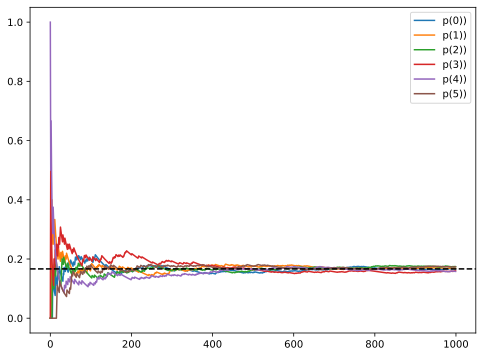

In [18]:
plt.figure(figsize=(8,6))
for i in range(6):
    plt.plot(estimates[i,:].asnumpy(), label=('p({}))'.format(i)))
plt.axhline(y=0.1666, color="black", linestyle='dashed')
plt.legend()
plt.show()